# **Malicious Website Detection by Machine Learning Techniques**

*Mini Project by Thasleema*

## **1. Objective:**

The detection of malicious websites is a critical aspect of cybersecurity, aiming to protect
users from various online threats such as fraud, data theft, and malware infections. Malicious
websites are designed with harmful intent, often attempting to deceive users by mimicking
legitimate sites. This paper presents a comprehensive overview of methods and best practices
for identifying and detecting malicious websites.
One fundamental approach involves scrutinizing the website&#39;s URL for anomalies and
inconsistencies. Legitimate websites typically have clear and concise URLs, while malicious
ones may employ misspelled or altered variations of well-known domain names.
Additionally, the use of HTTPS is a crucial indicator of website security. Secure websites
encrypt data transmitted between the user and the server, enhancing privacy and safeguarding
against potential cyberattacks. In conclusion, a multi-faceted approach to detecting malicious
websites involves a combination of user vigilance, adherence to best practices, and the use of
technology-driven solutions. By adopting these strategies, individuals can minimize the risk
of falling victim to online threats and contribute to a safer digital environment.

## **2. Loading Data:**

### Importing necessary Packages

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Importing dependencies
import re
import warnings
warnings.filterwarnings('ignore')
from tld import get_tld
#tld Module: This module typically stands for "top-level domain". It's used for extracting the top-level domain (TLD) from a given URL. 
#TLDs are the highest level in the hierarchical Domain Name System (DNS) of the internet. For instance, in the URL "https://www.example.com", the TLD is ".com". 
#The get_tld function in the tld module is used to extract this information. It provides a way to parse URLs and retrieve the TLD portion.

from urllib.parse import urlparse
#urllib.parse Module: This module is part of Python's standard library and provides functions for parsing URLs. 
#The urlparse function is used to break down a URL into its components, such as the scheme, network location, path, query parameters, etc.

# Machine Learning Packages

# To install : pip install scikit-learn
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
#TfidfVectorizer is a class in the scikit-learn library, which is a popular machine learning library for Python. 
#It is used for converting a collection of raw documents into a matrix of TF-IDF (Term Frequency-Inverse Document Frequency) features.

In [ ]:
# pip install scikit-learn  # to run the cell : shift+enter

In [2]:
urldata = pd.read_csv(r"C:\Users\DEEPA\Desktop\Malicious\urldata2.csv")

### Anaysing the dataset

In [3]:
urldata.head()

,Unnamed: 0,url,label,result
0,0,https://www.google.com,benign,0
1,1,https://www.youtube.com,benign,0
2,2,https://www.facebook.com,benign,0
3,3,https://www.baidu.com,benign,0
4,4,https://www.wikipedia.org,benign,0


#### Drop the unwanted columns

In [4]:
urldata = urldata.drop(['Unnamed: 0'],axis=1)

## **3. Familiarizing with Data**

In [5]:
urldata.head()

,url,label,result
0,https://www.google.com,benign,0
1,https://www.youtube.com,benign,0
2,https://www.facebook.com,benign,0
3,https://www.baidu.com,benign,0
4,https://www.wikipedia.org,benign,0


In [6]:
# to get more information
urldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89732 entries, 0 to 89731
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   url     89732 non-null  object
 1   label   89732 non-null  object
 2   result  89732 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.1+ MB


In [7]:
urldata.groupby('label').count()

,url,result
label,,
benign,44866,44866
malicious,44866,44866


In [8]:
urldata.shape

(89732, 3)

In [9]:
#  to check the null values or missing values
urldata.isnull().sum()

url       0
label     0
result    0
dtype: int64

No missing values in any column.

## **4. Data Preprocessing & EDA**

In [10]:
# to get the statistical information
urldata.describe()

,result
count,89732.000000
mean,0.500000
std,0.500003
min,0.000000
25%,0.000000
50%,0.500000
75%,1.000000
max,1.000000


In [11]:
duplicate_rows = urldata[urldata.duplicated()]

# If 'duplicate_rows' is empty, there are no duplicate rows in the DataFrame
if duplicate_rows.empty:
    print("No duplicate rows found.")
else:
    print("Duplicate rows found.")

No duplicate rows found.


In [12]:
num_duplicate_rows = len(duplicate_rows)
print("Number of duplicate rows:", num_duplicate_rows)

Number of duplicate rows: 0


The following features will be extracted from the URL for classification.

**Length Features**

Length Of Url

Length of Hostname

Length Of Path

Length Of First Directory

Length Of Top Level Domain

**Count Features**

Count Of '-'

Count Of '@'

Count Of '?'

Count Of '%'

Count Of '.'

Count Of '='

Count Of 'http'

Count Of 'www'

Count Of Digits

Count Of Letters

Count Of Number Of Directories

**Binary Features**

Use of IP or not

Use of Shortening URL or not

Apart from the lexical features, we will use TFID - Term Frequency Inverse Document as well.

## Length Features

In [13]:
#Length of URL
urldata['url_length'] = urldata['url'].apply(lambda i: len(str(i)))  #www.google.com  : no of characters

In [14]:
# Define a function to extract hostname length
def get_hostname_length(url):
    try:
        parsed_url = urlparse(url)
        return len(parsed_url.netloc)
    except Exception as e:
        print(f"Error parsing URL '{url}': {e}")
        return -1  # Indicate error with a sentinel value

# Apply the function to create the 'hostname_length' column
urldata['hostname_length'] = urldata['url'].apply(get_hostname_length)

In [15]:
#Path Length
urldata['path_length'] = urldata['url'].apply(lambda i: len(urlparse(i).path))

In [16]:
#First Directory Length

def fd_length(url):
    try:
        urlpath = urlparse(url).path
        if len(urlpath.split('/')) > 1:
            return len(urlpath.split('/')[1])
        else:
            return 0
    except ValueError:
        return 0

urldata['fd_length'] = urldata['url'].apply(fd_length)


In [17]:
#Length of Top Level Domain
urldata['tld'] = urldata['url'].apply(lambda i: get_tld(i,fail_silently=True))
def tld_length(tld):
    try:
        return len(tld)
    except:
        return -1

urldata['tld_length'] = urldata['tld'].apply(lambda i: tld_length(i))

In [18]:
urldata = urldata.drop(['tld'],axis=1)
urldata.head()

,url,label,result,url_length,hostname_length,path_length,fd_length,tld_length
0,https://www.google.com,benign,0,22,14,0,0,3
1,https://www.youtube.com,benign,0,23,15,0,0,3
2,https://www.facebook.com,benign,0,24,16,0,0,3
3,https://www.baidu.com,benign,0,21,13,0,0,3
4,https://www.wikipedia.org,benign,0,25,17,0,0,3


##  Count Features

In [19]:
urldata['count-'] = urldata['url'].apply(lambda i: i.count('-'))
urldata['count@'] = urldata['url'].apply(lambda i: i.count('@'))
urldata['count?'] = urldata['url'].apply(lambda i: i.count('?'))
urldata['count%'] = urldata['url'].apply(lambda i: i.count('%'))
urldata['count.'] = urldata['url'].apply(lambda i: i.count('.'))
urldata['count='] = urldata['url'].apply(lambda i: i.count('='))
urldata['count-http'] = urldata['url'].apply(lambda i : i.count('http'))
urldata['count-https'] = urldata['url'].apply(lambda i : i.count('https'))
urldata['count-www'] = urldata['url'].apply(lambda i: i.count('www'))

In [20]:
def digit_count(url):
    digits = 0
    for i in url:  
        if i.isnumeric():
            digits = digits + 1
    return digits
urldata['count-digits']= urldata['url'].apply(lambda i: digit_count(i))

In [21]:
def letter_count(url):
    letters = 0
    for i in url:
        if i.isalpha():
            letters = letters + 1
    return letters
urldata['count-letters']= urldata['url'].apply(lambda i: letter_count(i))

In [22]:
def no_of_dir(url):
    urldir = urlparse(url).path
    return urldir.count('/')
urldata['count_dir'] = urldata['url'].apply(lambda i: no_of_dir(i))

### Data after extracting Count Features

In [23]:
urldata.head()

,url,label,result,url_length,hostname_length,path_length,fd_length,tld_length,count-,count@,count?,count%,count.,count=,count-http,count-https,count-www,count-digits,count-letters,count_dir
0,https://www.google.com,benign,0,22,14,0,0,3,0,0,0,0,2,0,1,1,1,0,17,0
1,https://www.youtube.com,benign,0,23,15,0,0,3,0,0,0,0,2,0,1,1,1,0,18,0
2,https://www.facebook.com,benign,0,24,16,0,0,3,0,0,0,0,2,0,1,1,1,0,19,0
3,https://www.baidu.com,benign,0,21,13,0,0,3,0,0,0,0,2,0,1,1,1,0,16,0
4,https://www.wikipedia.org,benign,0,25,17,0,0,3,0,0,0,0,2,0,1,1,1,0,20,0


## Binary Features

In [24]:
#Use of IP or not in domain
def having_ip_address(url):
    match = re.search(
        '(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.'
        '([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\/)|'  # IPv4
        '((0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\/)' # IPv4 in hexadecimal
        '(?:[a-fA-F0-9]{1,4}:){7}[a-fA-F0-9]{1,4}', url)  # Ipv6
    if match:
        # print match.group()
        return -1
    else:
        # print 'No matching pattern found'
        return 1
urldata['use_of_ip'] = urldata['url'].apply(lambda i: having_ip_address(i))

In [25]:
def shortening_service(url):
    match = re.search('bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|'
                      'yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|'
                      'short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|'
                      'doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|'
                      'db\.tt|qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|'
                      'q\.gs|is\.gd|po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|'
                      'x\.co|prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|'
                      'tr\.im|link\.zip\.net',
                      url)
    if match:
        return -1
    else:
        return 1
urldata['short_url'] = urldata['url'].apply(lambda i: shortening_service(i))

### Data after extracting Binary Features

In [26]:
urldata.head()

,url,label,result,url_length,hostname_length,path_length,fd_length,tld_length,count-,count@,...,count.,count=,count-http,count-https,count-www,count-digits,count-letters,count_dir,use_of_ip,short_url
0,https://www.google.com,benign,0,22,14,0,0,3,0,0,...,2,0,1,1,1,0,17,0,1,1
1,https://www.youtube.com,benign,0,23,15,0,0,3,0,0,...,2,0,1,1,1,0,18,0,1,1
2,https://www.facebook.com,benign,0,24,16,0,0,3,0,0,...,2,0,1,1,1,0,19,0,1,1
3,https://www.baidu.com,benign,0,21,13,0,0,3,0,0,...,2,0,1,1,1,0,16,0,1,1
4,https://www.wikipedia.org,benign,0,25,17,0,0,3,0,0,...,2,0,1,1,1,0,20,0,1,1


## Data Vectorization Using TfidVectorizer

TF-IDF will transform the text into meaningful representation of integers or numbers which is used to fit machine learning algorithm for predictions. TF-IDF Vectorizer is a measure of originality of a word by comparing the number of times a word appears in document with the number of documents the word appears in.

1. Term Frequency (TF): Measures the frequency of a term (word) in a document. It indicates how often a term occurs in a document relative to the total number of terms in that document. TF is calculated using the formula: TF(term) = (Number of times term appears in a document) / (Total number of terms in the document).

2. Inverse Document Frequency (IDF): Measures the importance of a term across the entire corpus (collection of documents). It indicates how rare or common a term is across all documents. IDF is calculated using the formula: IDF(term) = log_e(Total number of documents / Number of documents containing the term).

3. TF-IDF: Combines TF and IDF to give weight to terms that are frequent in a document but rare across documents in the corpus. The TF-IDF score of a term in a document is the product of its TF and IDF scores. It helps in identifying the importance of terms in a document relative to the entire corpus.

TfidfVectorizer takes as input a collection of text documents and performs the following steps:

* Tokenizes the input text (splits it into individual words or tokens).
* Builds a vocabulary of all unique words in the corpus.
* Computes the TF-IDF score for each word in each document.
* Outputs a matrix where each row represents a document, each column represents a unique word in the vocabulary, and the cell value represents the TF-IDF score of that word in that document.



Here we are:

* Create tokenizer

* Split, Remove Repetitions and ".com"

## **Splitting the data**

In [28]:
# Features
x = urldata["url"]

In [29]:
# Labels
y = urldata["result"]

In [30]:
x.head()

0       https://www.google.com
1      https://www.youtube.com
2     https://www.facebook.com
3        https://www.baidu.com
4    https://www.wikipedia.org
Name: url, dtype: object

In [31]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: result, dtype: int64

In [32]:
# Using Tokenizer
vectorizer = TfidfVectorizer()

In [33]:
# Store vectors into X variable as Our XFeatures
X = vectorizer.fit_transform(x)

## Split into training and testing dataset 80/20 ratio

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)	

In [35]:
X_train.shape[0],len(y_train),X_test.shape[0],len(y_test)

(71785, 71785, 17947, 17947)

## **5. Data Visualization**

Text(0, 0.5, 'Number Of URLs')

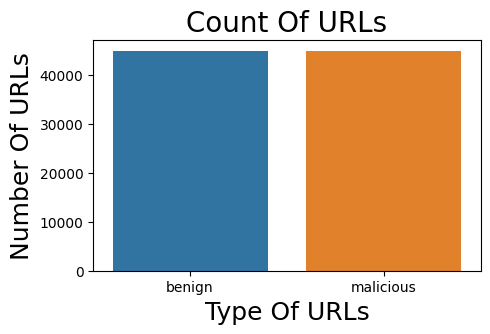

In [36]:
plt.figure(figsize=(5,3))
sns.countplot(x='label',data=urldata,hue='label')
plt.title("Count Of URLs",fontsize=20)
plt.xlabel("Type Of URLs",fontsize=18)
plt.ylabel("Number Of URLs",fontsize=18)

Text(0, 0.5, 'Number Of Urls')

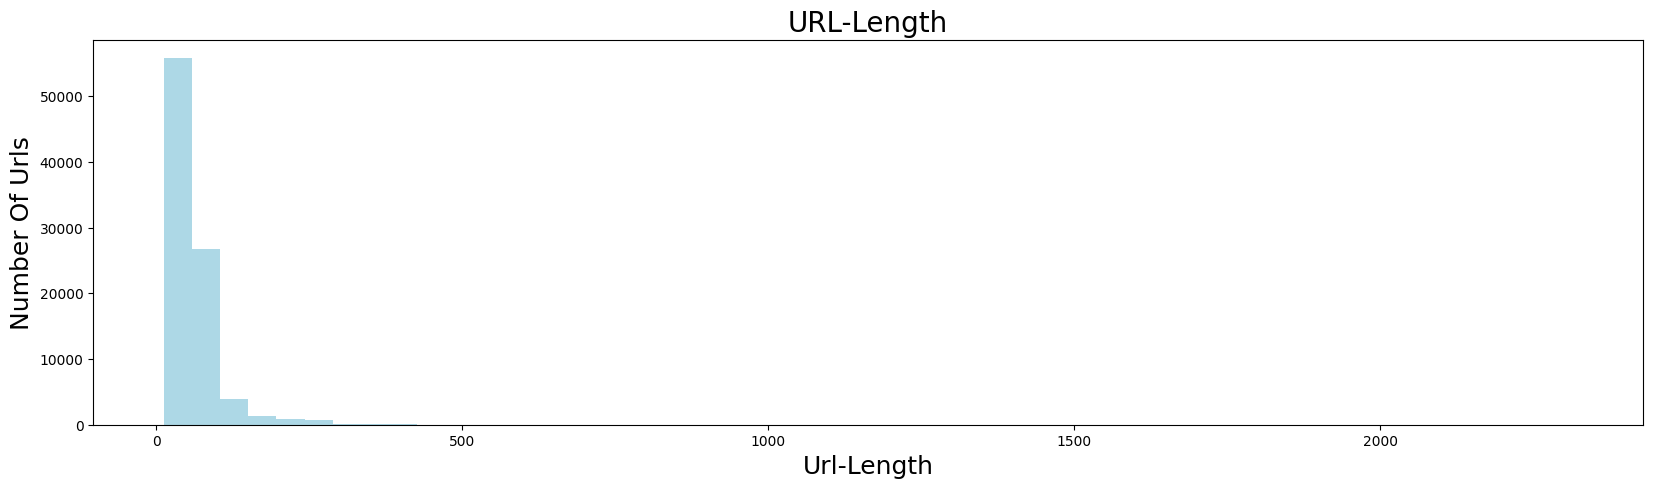

In [37]:
plt.figure(figsize=(20,5))
plt.hist(urldata['url_length'],bins=50,color='LightBlue')
plt.title("URL-Length",fontsize=20)
plt.xlabel("Url-Length",fontsize=18)
plt.ylabel("Number Of Urls",fontsize=18)

Text(0, 0.5, 'Number Of Urls')

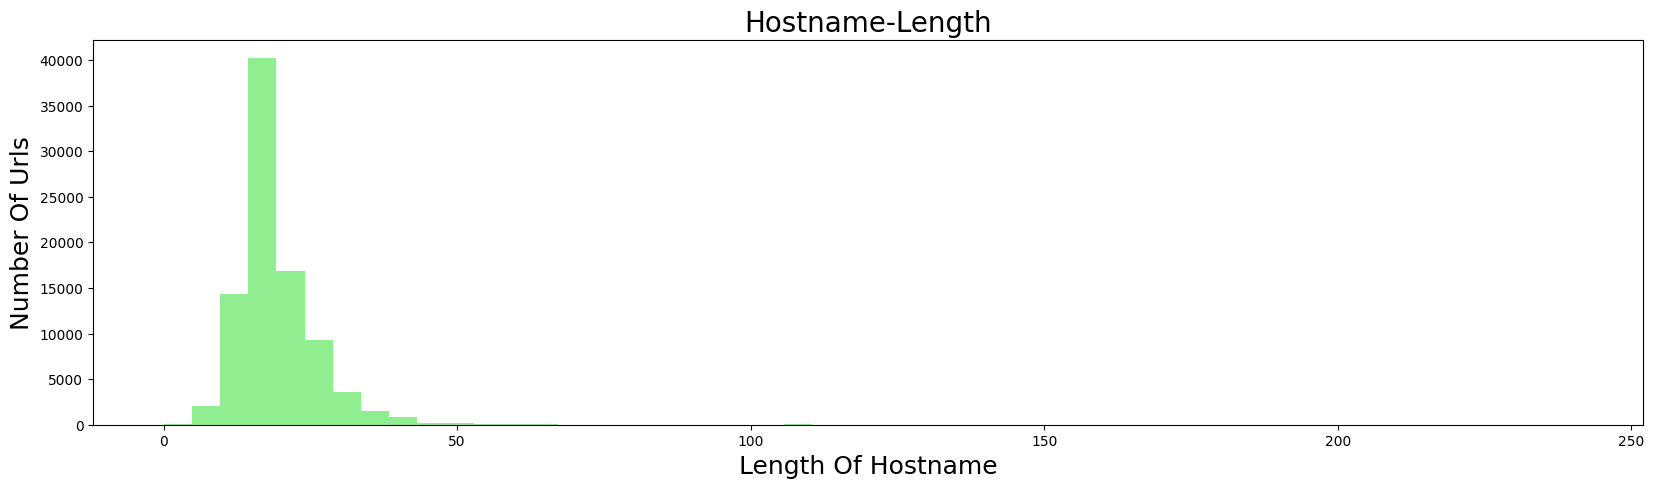

In [38]:
plt.figure(figsize=(20,5))
plt.hist(urldata['hostname_length'],bins=50,color='Lightgreen')
plt.title("Hostname-Length",fontsize=20)
plt.xlabel("Length Of Hostname",fontsize=18)
plt.ylabel("Number Of Urls",fontsize=18)

Text(0, 0.5, 'Number Of Urls')

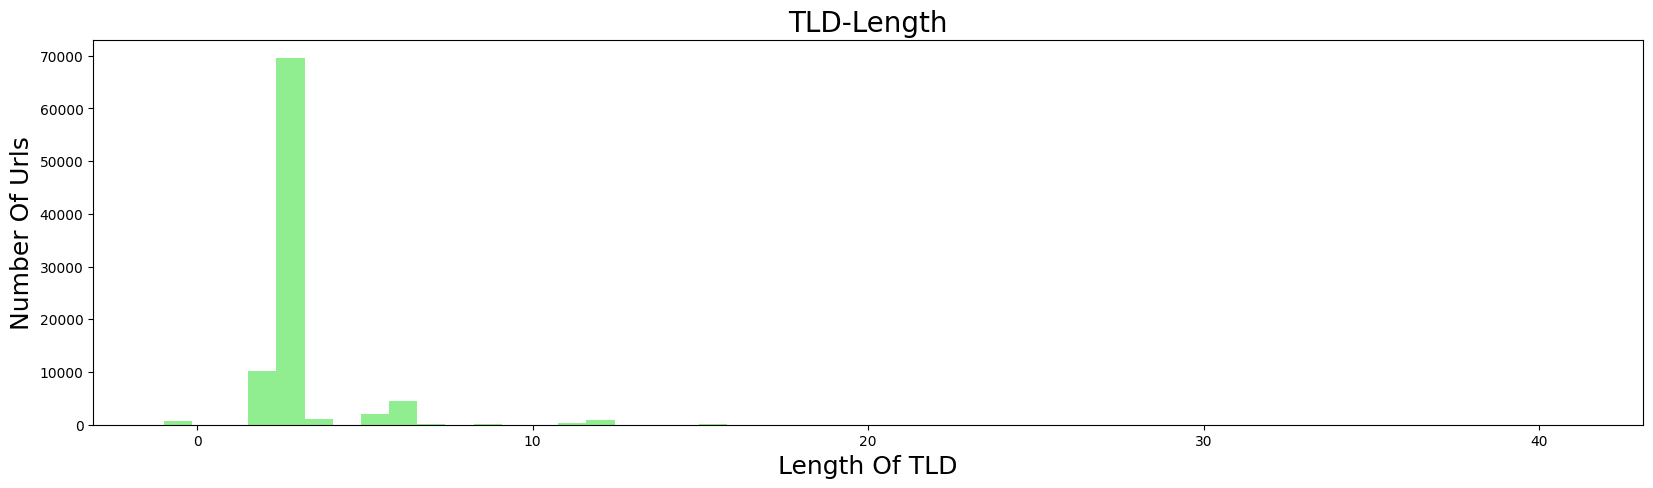

In [39]:
plt.figure(figsize=(20,5))
plt.hist(urldata['tld_length'],bins=50,color='Lightgreen')
plt.title("TLD-Length",fontsize=20)
plt.xlabel("Length Of TLD",fontsize=18)
plt.ylabel("Number Of Urls",fontsize=18)

Text(0, 0.5, 'Number Of URLs')

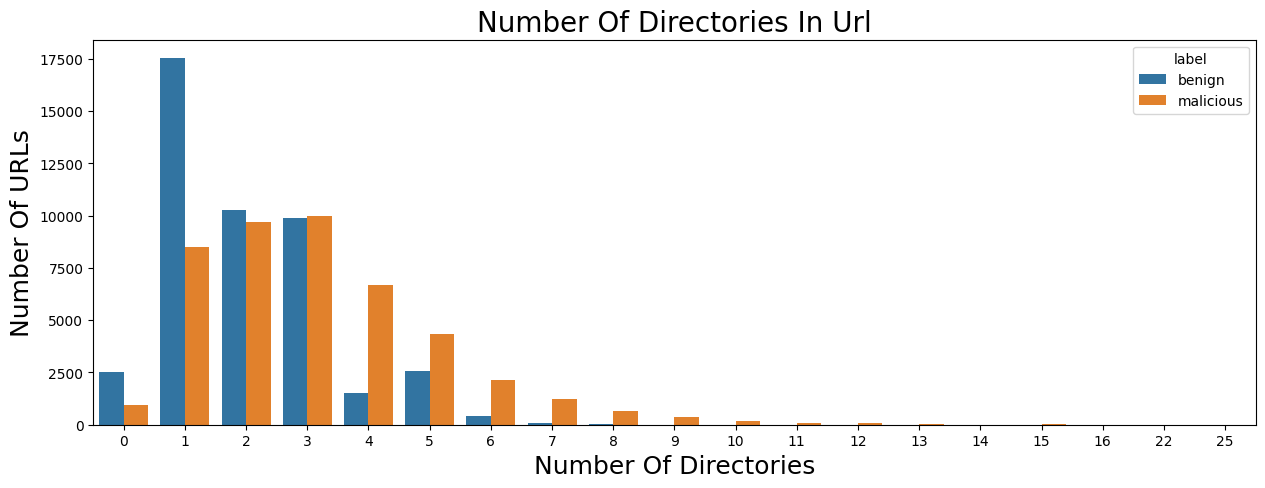

In [40]:
plt.figure(figsize=(15,5))
plt.title("Number Of Directories In Url",fontsize=20)
sns.countplot(x='count_dir',data=urldata,hue='label')
plt.xlabel("Number Of Directories",fontsize=18)
plt.ylabel("Number Of URLs",fontsize=18)

Text(0, 0.5, 'Number of URLs')

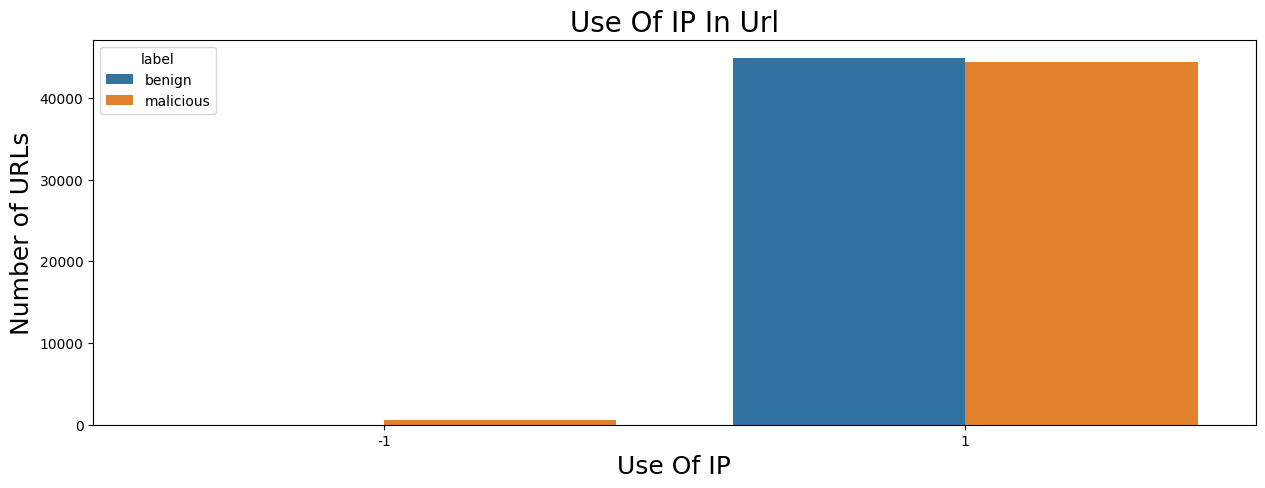

In [42]:
plt.figure(figsize=(15,5))
plt.title("Use Of IP In Url",fontsize=20)
plt.xlabel("Use Of IP",fontsize=18)
sns.countplot(x='use_of_ip',data=urldata,hue='label')
plt.ylabel("Number of URLs",fontsize=18)

Text(0, 0.5, 'Number of URLs')

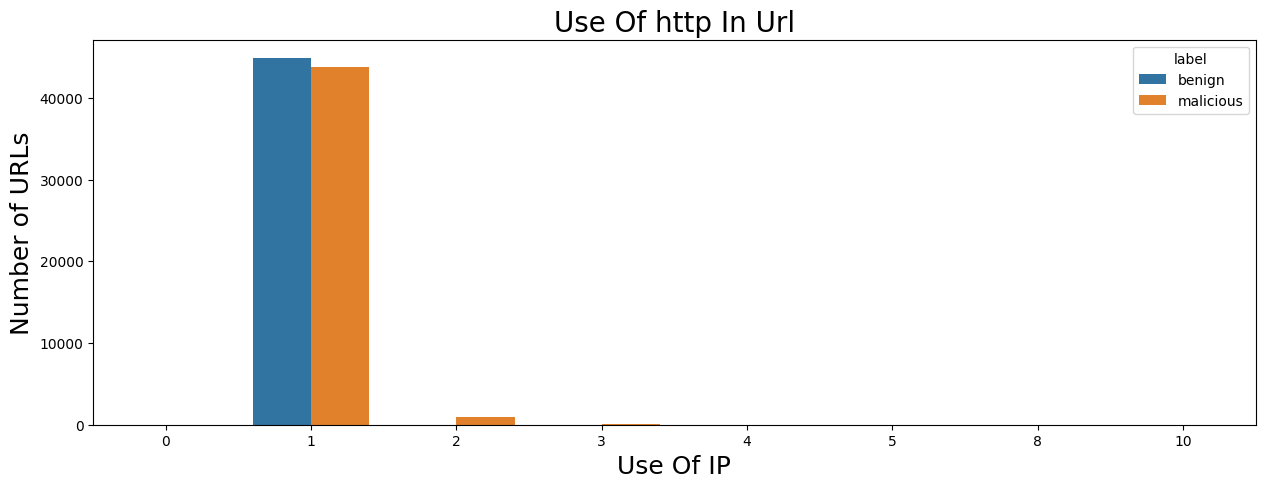

In [43]:
plt.figure(figsize=(15,5))
plt.title("Use Of http In Url",fontsize=20)
plt.xlabel("Use Of IP",fontsize=18)
sns.countplot(x='count-http',data=urldata,hue='label')
plt.ylabel("Number of URLs",fontsize=18)

Text(0, 0.5, 'Number Of URLs')

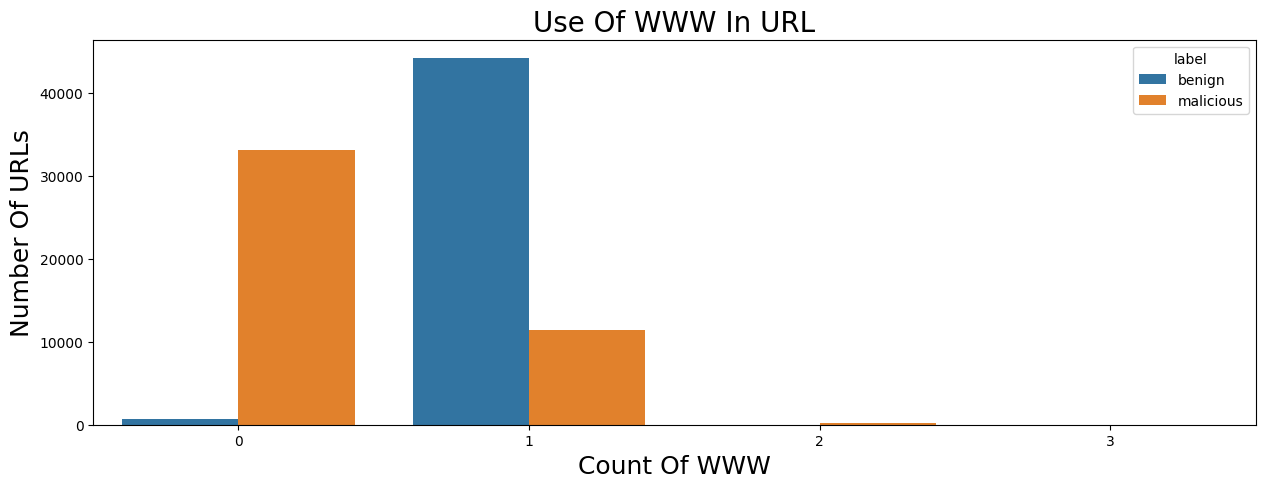

In [44]:
plt.figure(figsize=(15,5))
plt.title("Use Of WWW In URL",fontsize=20)
plt.xlabel("Count Of WWW",fontsize=18)
sns.countplot(x='count-www',data=urldata,hue='label')
plt.ylabel("Number Of URLs",fontsize=18)

## **6. Machine Learning Models & Training**

From the dataset above, it is clear that this is a supervised machine learning task. There are two major types of supervised machine learning problems, called classification and regression.

This data set comes under classification problem, as the input URL is classified as phishing (1) or legitimate (0). The supervised machine learning models (classification) considered to train the dataset in this notebook are:
* Decision Tree
* Random Forest
* Logistic Regression
* Support Vector Machines

### **6.1. Logistic Regression**

Logistic Regression is a classic and widely used statistical technique for binary classification. Despite its name, it's used for classification rather than regression. Logistic Regression models the probability that a given input belongs to a particular class using the logistic function, which maps any real-valued input into the range [0, 1]. It's particularly useful when the relationship between the features and the target variable is linear and the data is linearly separable.

In [45]:
logit = LogisticRegression()	
logit.fit(X_train, y_train)

LogisticRegression()

In [46]:
# Accuracy of Our Model Using Train Data
print(f"Logistic Regression Training Accuracy: {logit.score(X_train, y_train):.2%}")

Logistic Regression Training Accuracy: 99.32%


In [47]:
# Accuracy of Our Model Using Test Data
print(f"Logistic Regression Accuracy: {logit.score(X_test, y_test):.2%}")

Logistic Regression Accuracy: 99.11%


### **6.2. Decision Tree Classifier**
 Decision trees are widely used models for classification and regression tasks. Essentially, they learn a hierarchy of if/else questions, leading to a decision. Learning a decision tree means learning the sequence of if/else questions that gets us to the true answer most quickly.

In [48]:
tree = DecisionTreeClassifier()	
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [49]:
# Accuracy of Our Model Using Test Data
print(f"DecisionTreeClassifier Training Accuracy: {tree.score(X_train, y_train):.2%}")

DecisionTreeClassifier Training Accuracy: 100.00%


In [50]:
# Accuracy of Our Model Using Test Data
print(f"DecisionTreeClassifier Accuracy: {tree.score(X_test, y_test):.2%}")

DecisionTreeClassifier Accuracy: 99.24%


### **6.3. Random Forest Classifier**
Random forests for regression and classification are currently among the most widely used machine learning methods.A random forest is essentially a collection of decision trees, where each tree is slightly different from the others. The idea behind random forests is that each tree might do a relatively good job of predicting, but will likely overfit on part of the data.

If we build many trees, all of which work well and overfit in different ways, we can reduce the amount of overfitting by averaging their results. To build a random forest model, you need to decide on the number of trees to build (the n_estimators parameter of RandomForestRegressor or RandomForestClassifier). They are very powerful, often work well without heavy tuning of the parameters, and don’t require scaling of the data.

In [51]:
random = RandomForestClassifier()
random.fit(X_train, y_train)

RandomForestClassifier()

In [52]:
# Accuracy of Our Model Using Test Data
print(f"RandomForestClassifier Training Accuracy: {random.score(X_train, y_train):.2%}")

RandomForestClassifier Training Accuracy: 100.00%


In [53]:
# Accuracy of Our Model Using Test Data
print(f"RandomForestClassifier Accuracy: {random.score(X_test, y_test):.2%}")

RandomForestClassifier Accuracy: 99.37%


### **6.4. Support Vector Machines(SVM)**

In machine learning, support-vector machines (SVMs, also support-vector networks) are supervised learning models with associated learning algorithms that analyze data used for classification and regression analysis. Given a set of training examples, each marked as belonging to one or the other of two categories, an SVM training algorithm builds a model that assigns new examples to one category or the other, making it a non-probabilistic binary linear classifier.

In [54]:
svc = SVC()	
svc.fit(X_train, y_train)

SVC()

In [55]:
# Accuracy of Our Model Using Test Data
print(f"SVC Training Accuracy: {svc.score(X_train, y_train):.2%}")

SVC Training Accuracy: 99.90%


In [56]:
# Accuracy of Our Model Using Test Data
print(f"SVC Accuracy: {svc.score(X_test, y_test):.2%}")

SVC Accuracy: 99.25%


# BEST MODEL IS RANDOM FOREST CLASSIFIER

## Saving the best model

In [57]:
import joblib

#save the model and vectorizer
joblib.dump(random, "RandomForestModel.pkl", protocol=2)
joblib.dump(vectorizer, "TfidfVectorizer.pkl", protocol=2)

['TfidfVectorizer.pkl']

## **7. Model Prediction**

In [58]:
model = joblib.load(r"C:\Users\DEEPA\Desktop\Malicious\RandomForestModel.pkl")
vec = joblib.load(r"C:\Users\DEEPA\Desktop\Malicious\TfidfVectorizer.pkl")

In [59]:
labels = ["BENIGN","MALICIOUS"]

In [60]:
test1 = model.predict(vec.transform(["https://www.monographicreview.org/"]))

In [61]:
labels[test1[0]]

'BENIGN'

In [62]:
test2 = model.predict(vec.transform(["http://signin.resolver-access.cf/webapps/a4a86/"]))

In [63]:
labels[test2[0]]

'MALICIOUS'

In [64]:
test3 = model.predict(vec.transform(["http://problem-page.in/hokikausayangpial/log.php"]))
labels[test3[0]]

'MALICIOUS'

In [65]:
test4 = model.predict(vec.transform(["https://www.facebook.com"]))
labels[test4[0]]

'BENIGN'

## **8. Model Evaluation**

In [66]:
accuracy = model.score(X_test,y_test)
print(f"Accuracy of Random Forest Classifier: {accuracy:.2%}")

Accuracy of Random Forest Classifier: 99.37%


In [67]:
y_pred = model.predict(X_test)

In [68]:
print("\n*================ CLASSIFICATION REPORT ================*\n")
print(classification_report(y_test, y_pred))


*================ CLASSIFICATION REPORT ================*

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      9032
           1       0.99      0.99      0.99      8915

    accuracy                           0.99     17947
   macro avg       0.99      0.99      0.99     17947
weighted avg       0.99      0.99      0.99     17947



In [69]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[8982,   50],
       [  63, 8852]], dtype=int64)


* ======================== CONFUSION MATRIX ======================== *



<Axes: >

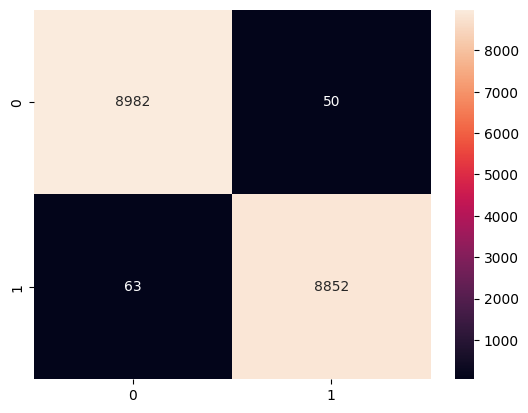

In [70]:
print("\n* ======================== CONFUSION MATRIX ======================== *\n") 
sns.heatmap(cm,annot=True,fmt='d')

## **9.CLASSIFICATION REPORT AND CONFUSION MATRIX OF OTHER MODELS**

### LOGISTIC REGRESSION EVALUATION MATRIX


*================ CLASSIFICATION REPORT OF LOGISTIC REGRESSION ================*

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      9032
           1       0.99      0.99      0.99      8915

    accuracy                           0.99     17947
   macro avg       0.99      0.99      0.99     17947
weighted avg       0.99      0.99      0.99     17947


* ======================== CONFUSION MATRIX OF LOGISTIC REGRESSION ======================== *



<Axes: >

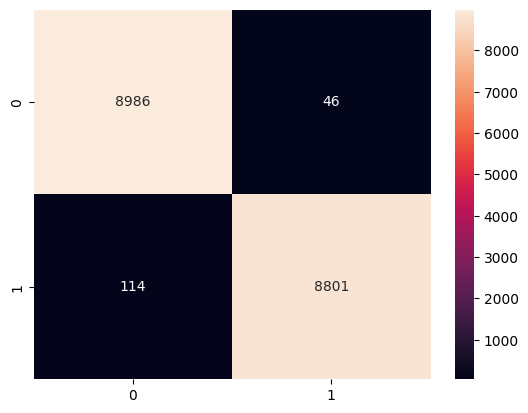

In [71]:
logistic_pred = logit.predict(X_test)
print("\n*================ CLASSIFICATION REPORT OF LOGISTIC REGRESSION ================*\n")
print(classification_report(y_test, logistic_pred))
log_cm = confusion_matrix(y_test,logistic_pred)
print("\n* ======================== CONFUSION MATRIX OF LOGISTIC REGRESSION ======================== *\n") 
sns.heatmap(log_cm,annot=True,fmt='d')

### DECISION TREE CLASSIFIER EVALUATION MATRIX


*================ CLASSIFICATION REPORT OF DECISION TREE CLASSIFIER ================*

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      9032
           1       0.99      0.99      0.99      8915

    accuracy                           0.99     17947
   macro avg       0.99      0.99      0.99     17947
weighted avg       0.99      0.99      0.99     17947


* ======================== CONFUSION MATRIX OF DECISION TREE CLASSIFIER ======================== *



<Axes: >

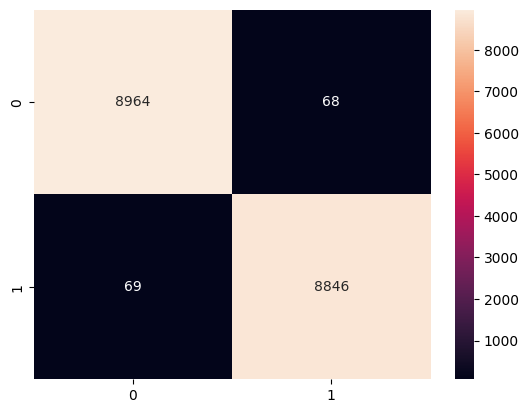

In [72]:
decision_pred = tree.predict(X_test)
print("\n*================ CLASSIFICATION REPORT OF DECISION TREE CLASSIFIER ================*\n")
print(classification_report(y_test, decision_pred))
decision_cm = confusion_matrix(y_test,decision_pred)
print("\n* ======================== CONFUSION MATRIX OF DECISION TREE CLASSIFIER ======================== *\n") 
sns.heatmap(decision_cm,annot=True,fmt='d')

### SVC EVALUATION MATRIX


*================ CLASSIFICATION REPORT OF SVC ================*

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      9032
           1       0.99      0.99      0.99      8915

    accuracy                           0.99     17947
   macro avg       0.99      0.99      0.99     17947
weighted avg       0.99      0.99      0.99     17947


* ======================== CONFUSION MATRIX OF SVC ======================== *



<Axes: >

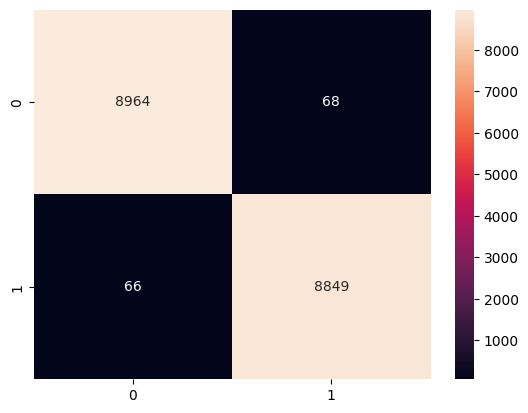

In [73]:
SVC_pred = svc.predict(X_test)
print("\n*================ CLASSIFICATION REPORT OF SVC ================*\n")
print(classification_report(y_test, SVC_pred))
SVC_cm = confusion_matrix(y_test,SVC_pred)
print("\n* ======================== CONFUSION MATRIX OF SVC ======================== *\n") 
sns.heatmap(SVC_cm,annot=True,fmt='d')

** ============================================= END OF FILE ============================================ **